In [1]:
%run imports.ipynb

In [2]:
data_orig = pd.read_excel('data/huang_etal_data.xlsx')

In [3]:
ratio_col = 'Stability ratio (Normalized to DNMT3AWT)'

data_grouped = data_orig.groupby('order').agg({
    ratio_col: 'mean'
}).reset_index().rename({'order': 'aa_position', 'Stability ratio (Normalized to DNMT3AWT)': 'stability_ratio_normalized_to_WT'}, axis=1)

ratio_col = 'stability_ratio_normalized_to_WT'

In [6]:
data_grouped.to_csv('source_data/stability_scores.csv', index=False)

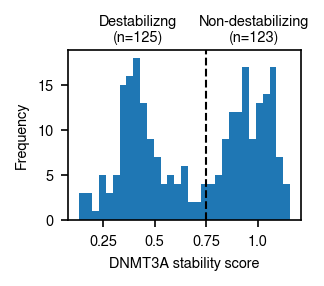

In [7]:
data_grouped = pd.read_csv('source_data/stability_scores.csv')

fig = plt.figure(figsize=(2, 1.5))
ax = fig.add_subplot(111)

ax.hist(data_grouped[ratio_col], bins=31, histtype='stepfilled')

ax.text(0.3, 1.03, f'Destabilizng\n(n={(data_grouped[ratio_col] < 0.75).sum()})', ha='center', va='bottom', transform=ax.transAxes)
ax.text(0.8, 1.03, f'Non-destabilizing\n(n={(data_grouped[ratio_col] >= 0.75).sum()})', ha='center', va='bottom', transform=ax.transAxes)

ax.axvline(0.75, ls='--', lw=1, c='k')

ax.set_xticks([0.25, 0.5, 0.75, 1.0])
ax.set_xticklabels([0.25, 0.5, 0.75, 1.0])

ax.set_xlabel('DNMT3A stability score')
ax.set_ylabel('Frequency')

save_figures('source_data_figures/stability_score/stability_ratio_distribution')